In [20]:
# --------------------------------------------
# IMPORT LIBRAIRIES
# --------------------------------------------
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import importlib

import func_causalite as f
importlib.reload(f)

pd.set_option('display.max_rows', None)

# Simulation 1 : 2 covariables sans termes croisés

In [51]:
Nobs = 1000 # nombre d'observations
alpha_tau = 1 #effet du traitement
alpha_eZ = [2,2,0,0] #effet des covariables sur le propensity score
NX = np.size(alpha_eZ) # nombre de covariables
alpha_eY = [-2,-2,0,0] #effet des covariables sur la variable d'intérêt
alphaXCrossX_eZ = np.zeros((NX,NX)) #effet croisé des covariables sur le propensity score
alphaXCrossX_eY = np.zeros((NX,NX)) #effet croisé des covariables sur la variable d'intérêt
alphaXCrossZ_eY = [0,0,0,0]
df, tau_pf, tau_causal = f.genData(Nobs,alpha_tau,alpha_eZ,alpha_eY,alphaXCrossX_eZ,alphaXCrossX_eY,alphaXCrossZ_eY)
print('VALEURS TAU SIMULATION :')
print('tau_pf = E[Y,Z=1] - E[Y,Z=0] =', round(tau_pf,ndigits=3))   
print('tau_causal = E[Y(1)] - E[Y(0)] =', round(tau_causal ,ndigits=3))
print('')

f.print_moy_strat(df)
print('')

f.print_res_sim(df)

VALEURS TAU SIMULATION :
tau_pf = E[Y,Z=1] - E[Y,Z=0] = -0.079
tau_causal = E[Y(1)] - E[Y(0)] = 0.179

RESULTATS DE LA MOYENNE STRATIFIÉE :
             E[Y|Z=0]  E[Y|Z=1]  N(Z=0)  N(Z=1)      Diff  Poids
X1 X2 X3 X4                                                     
0  0  0  0   0.694030  0.927273   134.0    55.0  0.233243  189.0
         1   0.760000  0.923077    75.0    13.0  0.163077   88.0
      1  0   0.779221  0.909091    77.0    22.0  0.129870   99.0
         1   0.727273  0.900000    33.0    10.0  0.172727   43.0
   1  0  0   0.361111  0.451220    36.0    82.0  0.090108  118.0
         1   0.238095  0.375000    21.0    32.0  0.136905   53.0
      1  0   0.285714  0.451613    21.0    31.0  0.165899   52.0
         1   0.714286  0.647059     7.0    17.0 -0.067227   24.0
1  0  0  0   0.258065  0.492958    31.0    71.0  0.234893  102.0
         1   0.000000  0.575758    11.0    33.0  0.575758   44.0
      1  0   0.187500  0.439024    16.0    41.0  0.251524   57.0
         1   0.

In [52]:
lbLogY,ubLogY,lbArbY,ubArbY,lbLogE,ubLogE,lbArbE,ubArbE = f.calculBootstrap(df,100)
print('')
print('INTERVALLE DE CONFIANCE IPW reg. log.')
print(str(lbLogE) + '-' + str(ubLogE))
print('INTERVALLE DE CONFIANCE IPW arb. dec.')
print(str(lbArbE) + '-' + str(ubArbE))
print('INTERVALLE DE CONFIANCE OR reg. log.')
print(str(lbLogY) + '-' + str(ubLogY))
print('INTERVALLE DE CONFIANCE OR arb. dec.')
print(str(lbArbY) + '-' + str(ubArbY))


INTERVALLE DE CONFIANCE IPW reg. log.
0.10688741917320917-0.2204261855379876
INTERVALLE DE CONFIANCE IPW arb. dec.
0.11412611986190739-0.22561446926710219
INTERVALLE DE CONFIANCE OR reg. log.
0.09634589499837136-0.2013451711130708
INTERVALLE DE CONFIANCE OR arb. dec.
0.11412611986190736-0.2256144692671021


# Simulation 2 : 2 covariables avec termes croisés pour Y

In [46]:
Nobs = 1000000 # nombre d'observations
alpha_tau = 1 #effet du traitement
alpha_eZ = [2,2,0,0] #effet des covariables sur le propensity score
NX = np.size(alpha_eZ) # nombre de covariables
alpha_eY = [-2,-2,0,0] #effet des covariables sur la variable d'intérêt
alphaXCrossX_eZ = np.zeros((NX,NX)) #effet croisé des covariables sur le propensity score
alphaXCrossX_eY = np.zeros((NX,NX)) #effet croisé des covariables sur la variable d'intérêt
alphaXCrossX_eZ[0,1] = 0 #effet croisé des covariables sur le propensity score
alphaXCrossX_eY[0,1] = -2 #effet croisé des covariables sur la variable d'intérêt
alphaXCrossZ_eY = [0,0,0,0]
df, tau_pf, tau_causal = f.genData(Nobs,alpha_tau,alpha_eZ,alpha_eY,alphaXCrossX_eZ,alphaXCrossX_eY,alphaXCrossZ_eY)
print('VALEURS TAU SIMULATION :')
print('tau_pf = E[Y,Z=1] - E[Y,Z=0] =', round(tau_pf,ndigits=3))   
print('tau_causal = E[Y(1)] - E[Y(0)] =', round(tau_causal ,ndigits=3))
print('')

f.print_moy_strat(df)
print('')

f.print_res_sim(df)

VALEURS TAU SIMULATION :
tau_pf = E[Y,Z=1] - E[Y,Z=0] = -0.117
tau_causal = E[Y(1)] - E[Y(0)] = 0.166

RESULTATS DE LA MOYENNE STRATIFIÉE :
             E[Y|Z=0]  E[Y|Z=1]    N(Z=0)   N(Z=1)      Diff     Poids
X1 X2 X3 X4                                                           
0  0  0  0   0.772875  0.904089  156046.0  41528.0  0.131214  197574.0
         1   0.772810  0.901823   78199.0  20738.0  0.129012   98937.0
      1  0   0.772651  0.903317   78342.0  20593.0  0.130666   98935.0
         1   0.773709  0.901858   39246.0  10281.0  0.128148   49527.0
   1  0  0   0.316956  0.556793   33197.0  65351.0  0.239837   98548.0
         1   0.310637  0.559067   16640.0  32810.0  0.248430   49450.0
      1  0   0.314879  0.554206   16527.0  32607.0  0.239327   49134.0
         1   0.311423  0.559045    8474.0  16369.0  0.247621   24843.0
1  0  0  0   0.313883  0.555397   33299.0  65346.0  0.241514   98645.0
         1   0.311354  0.551645   16804.0  32530.0  0.240290   49334.0
      1 

In [36]:
lbLogY,ubLogY,lbArbY,ubArbY,lbLogE,ubLogE,lbArbE,ubArbE = f.calculBootstrap(df,100)
print('')
print('INTERVALLE DE CONFIANCE IPW reg. log.')
print(str(lbLogE) + '-' + str(ubLogE))
print('INTERVALLE DE CONFIANCE IPW arb. dec.')
print(str(lbArbE) + '-' + str(ubArbE))
print('INTERVALLE DE CONFIANCE OR reg. log.')
print(str(lbLogY) + '-' + str(ubLogY))
print('INTERVALLE DE CONFIANCE OR arb. dec.')
print(str(lbArbY) + '-' + str(ubArbY))


INTERVALLE DE CONFIANCE IPW reg. log.
0.100280868816185-0.17877136703926078
INTERVALLE DE CONFIANCE IPW arb. dec.
0.11166144402367567-0.18702671800948226
INTERVALLE DE CONFIANCE OR reg. log.
0.11932085681783983-0.19512520054576715
INTERVALLE DE CONFIANCE OR arb. dec.
0.1116614440236757-0.18702671800948234


# Simulation 3 : 2 covariables avec termes croisés pour Z

In [44]:
Nobs = 1000000 # nombre d'observations
alpha_tau = 1 #effet du traitement
alpha_eZ = [2,2,0,0] #effet des covariables sur le propensity score
NX = np.size(alpha_eZ) # nombre de covariables
alpha_eY = [-2,-2,0,0] #effet des covariables sur la variable d'intérêt
alphaXCrossX_eZ = np.zeros((NX,NX)) #effet croisé des covariables sur le propensity score
alphaXCrossX_eY = np.zeros((NX,NX)) #effet croisé des covariables sur la variable d'intérêt
alphaXCrossX_eZ[0,1] = -2 #effet croisé des covariables sur le propensity score
alphaXCrossX_eY[0,1] = 0 #effet croisé des covariables sur la variable d'intérêt
alphaXCrossZ_eY = [0,0,0,0]
df, tau_pf, tau_causal = f.genData(Nobs,alpha_tau,alpha_eZ,alpha_eY,alphaXCrossX_eZ,alphaXCrossX_eY,alphaXCrossZ_eY)
print('VALEURS TAU SIMULATION :')
print('tau_pf = E[Y,Z=1] - E[Y,Z=0] =', round(tau_pf,ndigits=3))   
print('tau_causal = E[Y(1)] - E[Y(0)] =', round(tau_causal ,ndigits=3))
print('')

f.print_moy_strat(df)
print('')

f.print_res_sim(df)

VALEURS TAU SIMULATION :
tau_pf = E[Y,Z=1] - E[Y,Z=0] = -0.043
tau_causal = E[Y(1)] - E[Y(0)] = 0.177

RESULTATS DE LA MOYENNE STRATIFIÉE :
             E[Y|Z=0]  E[Y|Z=1]    N(Z=0)   N(Z=1)      Diff     Poids
X1 X2 X3 X4                                                           
0  0  0  0   0.730428  0.880611  148899.0  48991.0  0.150183  197890.0
         1   0.733485  0.878650   74660.0  24145.0  0.145165   98805.0
      1  0   0.730321  0.885209   74240.0  24366.0  0.154888   98606.0
         1   0.732466  0.877878   37300.0  12422.0  0.145411   49722.0
   1  0  0   0.265708  0.499180   28712.0  70147.0  0.233473   98859.0
         1   0.272625  0.499374   14199.0  35148.0  0.226749   49347.0
      1  0   0.267870  0.498272   14410.0  35017.0  0.230403   49427.0
         1   0.268223  0.500085    7367.0  17611.0  0.231862   24978.0
1  0  0  0   0.267397  0.500911   28568.0  69671.0  0.233514   98239.0
         1   0.272062  0.497726   14346.0  35188.0  0.225665   49534.0
      1 

In [34]:
lbLogY,ubLogY,lbArbY,ubArbY,lbLogE,ubLogE,lbArbE,ubArbE = f.calculBootstrap(df,100)
print('')
print('INTERVALLE DE CONFIANCE IPW reg. log.')
print(str(lbLogE) + '-' + str(ubLogE))
print('INTERVALLE DE CONFIANCE IPW arb. dec.')
print(str(lbArbE) + '-' + str(ubArbE))
print('INTERVALLE DE CONFIANCE OR reg. log.')
print(str(lbLogY) + '-' + str(ubLogY))
print('INTERVALLE DE CONFIANCE OR arb. dec.')
print(str(lbArbY) + '-' + str(ubArbY))


INTERVALLE DE CONFIANCE IPW reg. log.
0.1642092568501761-0.2630176935667514
INTERVALLE DE CONFIANCE IPW arb. dec.
0.16016670924100865-0.2615537933594163
INTERVALLE DE CONFIANCE OR reg. log.
0.15306934288605378-0.24330256569859468
INTERVALLE DE CONFIANCE OR arb. dec.
0.1601667092410087-0.26155379335941636


# GRAPHIQUE

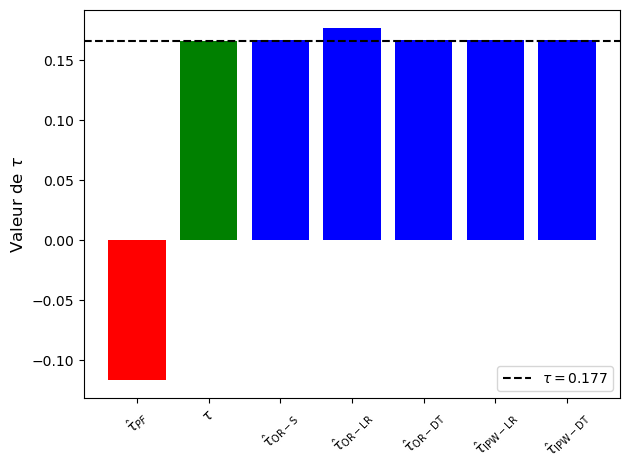

In [48]:
import matplotlib.pyplot as plt

# Données
valeurs = [-0.117, 0.166, 0.167, 0.177, 0.167, 0.167, 0.167]
labels = [
    r'$\hat{\tau}_{PF}$',
    r'$\tau$',
    r'$\hat{\tau}_{\mathrm{OR-S}}$',
    r'$\hat{\tau}_{\mathrm{OR-LR}}$',
    r'$\hat{\tau}_{\mathrm{OR-DT}}$',
    r'$\hat{\tau}_{\mathrm{IPW-LR}}$',
    r'$\hat{\tau}_{\mathrm{IPW-DT}}$'
]
couleurs = ['red', 'green', 'blue', 'blue', 'blue', 'blue', 'blue']
tau = 0.166

# Tracé
plt.bar(labels, valeurs, color=couleurs)
plt.axhline(y=tau, color='black', linestyle='--', label=r'$\tau = 0.177$')

plt.ylabel(r"Valeur de $\tau$", fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()




# ANNEXES

# Simulation 4 : 2 covariables avec termes croisés pour Y et Z

In [ ]:
Nobs = 1000000 # nombre d'observations
alpha_tau = 1 #effet du traitement
alpha_eZ = [2,2,0,0] #effet des covariables sur le propensity score
NX = np.size(alpha_eZ) # nombre de covariables
alpha_eY = [-2,-2,0,0] #effet des covariables sur la variable d'intérêt
alphaXCrossX_eZ = np.zeros((NX,NX)) #effet croisé des covariables sur le propensity score
alphaXCrossX_eY = np.zeros((NX,NX)) #effet croisé des covariables sur la variable d'intérêt
alphaXCrossX_eZ[0,1] = -2 #effet croisé des covariables sur le propensity score
alphaXCrossX_eY[0,1] = -2 #effet croisé des covariables sur la variable d'intérêt
alphaXCrossZ_eY = [2,0,0,0]
df, tau_pf, tau_causal = f.genData(Nobs,alpha_tau,alpha_eZ,alpha_eY,alphaXCrossX_eZ,alphaXCrossX_eY,alphaXCrossZ_eY)
print('VALEURS TAU SIMULATION :')
print('tau_pf = E[Y,Z=1] - E[Y,Z=0] =', round(tau_pf,ndigits=3))   
print('tau_causal = E[Y(1)] - E[Y(0)] =', round(tau_causal ,ndigits=3))
print('')

f.print_moy_strat(df)
print('')

f.print_res_sim(df)

VALEURS TAU SIMULATION :
tau_pf = E[Y,Z=1] - E[Y,Z=0] = 0.072
tau_causal = E[Y(1)] - E[Y(0)] = 0.257

RESULTATS DE LA MOYENNE STRATIFIÉE :
             E[Y|Z=0]  E[Y|Z=1]    N(Z=0)   N(Z=1)      Diff     Poids
X1 X2 X3 X4                                                           
0  0  0  0   0.773022  0.903457  147975.0  48735.0  0.130435  196710.0
         1   0.773703  0.899513   74875.0  24650.0  0.125810   99525.0
      1  0   0.770498  0.901221   74082.0  24327.0  0.130723   98409.0
         1   0.772389  0.902652   37195.0  12368.0  0.130263   49563.0
   1  0  0   0.313570  0.554449   28571.0  69873.0  0.240879   98444.0
         1   0.316479  0.556258   14576.0  34946.0  0.239779   49522.0
      1  0   0.317532  0.553883   14619.0  34872.0  0.236351   49491.0
         1   0.311868  0.551183    7314.0  17330.0  0.239315   24644.0
1  0  0  0   0.313566  0.900951   28836.0  70218.0  0.587385   99054.0
         1   0.316217  0.902562   14392.0  35325.0  0.586345   49717.0
      1  

# Simulation 5 : 2 covariables, mais le modèle Y ne voit que la première

In [ ]:
Nobs = 1000000 # nombre d'observations
alpha_tau = 1 #effet du traitement
alpha_eZ = [2,2,0,0] #effet des covariables sur le propensity score
NX = np.size(alpha_eZ) # nombre de covariables
alpha_eY = [-2,-2,0,0] #effet des covariables sur la variable d'intérêt
alphaXCrossX_eZ = np.zeros((NX,NX)) #effet croisé des covariables sur le propensity score
alphaXCrossX_eY = np.zeros((NX,NX)) #effet croisé des covariables sur la variable d'intérêt
alphaXCrossZ_eY = [0,0,0,0]
df, tau_pf, tau_causal = f.genData(Nobs,alpha_tau,alpha_eZ,alpha_eY,alphaXCrossX_eZ,alphaXCrossX_eY,alphaXCrossZ_eY)
print('VALEURS TAU SIMULATION :')
print('tau_pf = E[Y,Z=1] - E[Y,Z=0] =', round(tau_pf,ndigits=3))   
print('tau_causal = E[Y(1)] - E[Y(0)] =', round(tau_causal ,ndigits=3))
print('')

f.print_moy_strat(df)
print('')

vars_to_includeE = None
vars_to_includeY = ['X1']
f.print_res_sim(df,vars_to_includeY,vars_to_includeE)

VALEURS TAU SIMULATION :
tau_pf = E[Y,Z=1] - E[Y,Z=0] = -0.095
tau_causal = E[Y(1)] - E[Y(0)] = 0.177

RESULTATS DE LA MOYENNE STRATIFIÉE :
             E[Y|Z=0]  E[Y|Z=1]    N(Z=0)   N(Z=1)      Diff     Poids
X1 X2 X3 X4                                                           
0  0  0  0   0.731822  0.878919  157213.0  40890.0  0.147097  198103.0
         1   0.732106  0.878279   78490.0  20621.0  0.146173   99111.0
      1  0   0.731221  0.877924   78161.0  20520.0  0.146703   98681.0
         1   0.731229  0.874499   38996.0  10223.0  0.143270   49219.0
   1  0  0   0.266335  0.495471   33180.0  64698.0  0.229136   97878.0
         1   0.268115  0.498586   16713.0  32885.0  0.230471   49598.0
      1  0   0.266338  0.499358   16832.0  32712.0  0.233020   49544.0
         1   0.269845  0.496926    8390.0  16268.0  0.227081   24658.0
1  0  0  0   0.268171  0.498504   33680.0  65189.0  0.230333   98869.0
         1   0.264133  0.501704   16628.0  32868.0  0.237571   49496.0
      1 

# Simulation 5 : 2 covariables, mais le modèle Z ne voit que la première

In [ ]:
Nobs = 1000000 # nombre d'observations
alpha_tau = 1 #effet du traitement
alpha_eZ = [2,2,0,0] #effet des covariables sur le propensity score
NX = np.size(alpha_eZ) # nombre de covariables
alpha_eY = [-2,-2,0,0] #effet des covariables sur la variable d'intérêt
alphaXCrossX_eZ = np.zeros((NX,NX)) #effet croisé des covariables sur le propensity score
alphaXCrossX_eY = np.zeros((NX,NX)) #effet croisé des covariables sur la variable d'intérêt
alphaXCrossZ_eY = [0,0,0,0]
df, tau_pf, tau_causal = f.genData(Nobs,alpha_tau,alpha_eZ,alpha_eY,alphaXCrossX_eZ,alphaXCrossX_eY,alphaXCrossZ_eY)
print('VALEURS TAU SIMULATION :')
print('tau_pf = E[Y,Z=1] - E[Y,Z=0] =', round(tau_pf,ndigits=3))   
print('tau_causal = E[Y(1)] - E[Y(0)] =', round(tau_causal ,ndigits=3))
print('')

f.print_moy_strat(df)
print('')

vars_to_includeE = ['X1']
vars_to_includeY = None
f.print_res_sim(df,vars_to_includeY,vars_to_includeE)

VALEURS TAU SIMULATION :
tau_pf = E[Y,Z=1] - E[Y,Z=0] = -0.094
tau_causal = E[Y(1)] - E[Y(0)] = 0.177

RESULTATS DE LA MOYENNE STRATIFIÉE :
             E[Y|Z=0]  E[Y|Z=1]    N(Z=0)   N(Z=1)      Diff     Poids
X1 X2 X3 X4                                                           
0  0  0  0   0.729654  0.881830  156322.0  40975.0  0.152176  197297.0
         1   0.730313  0.879172   77868.0  20583.0  0.148859   98451.0
      1  0   0.731653  0.880684   78298.0  20584.0  0.149031   98882.0
         1   0.732122  0.885618   38790.0  10430.0  0.153497   49220.0
   1  0  0   0.268146  0.500852   33478.0  65137.0  0.232706   98615.0
         1   0.278142  0.501081   16772.0  32382.0  0.222939   49154.0
      1  0   0.265487  0.496117   16901.0  32966.0  0.230630   49867.0
         1   0.273361  0.502313    8326.0  16215.0  0.228952   24541.0
1  0  0  0   0.271882  0.499017   33566.0  65641.0  0.227135   99207.0
         1   0.265817  0.498576   16786.0  32647.0  0.232759   49433.0
      1 